In [1]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, execute, QuantumCircuit
from qiskit.tools.visualization import plot_histogram

In [4]:
import math, random

In [3]:
S_simulator = Aer.get_backend(name='statevector_simulator')
Q_simulator = Aer.get_backend(name='qasm_simulator')

# Consider a 8 bit string for this example, generating the secret string randomly

In [51]:
length = 8
secret_key = ''.join([str(random.randint(0, 1)) for _ in range(length)])

# Circuit design

In [57]:
q = QuantumRegister(length+1)
c = ClassicalRegister(length)

# BlackBox logic for $f_{s}(x)$ (not known to the user)

In [63]:
def blackbox(ckt, q, secret_key):
    for i, bit in enumerate(secret_key):
        if bit == '1':
            ckt.cx(q[i], q[-1])

# Phase Kickback Circuit

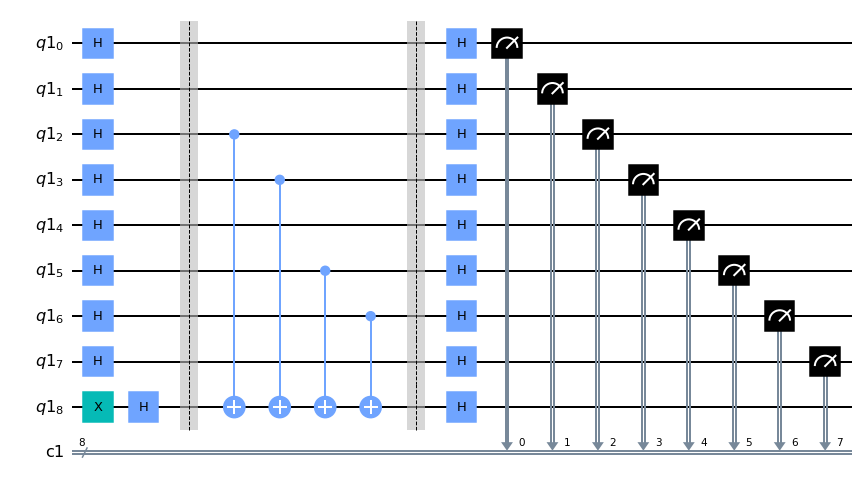

In [67]:
ckt = QuantumCircuit(q,c)

for i in range(length):
    ckt.h(q[i])   
    
ckt.x(q[-1])
ckt.h(q[-1])

ckt.barrier()
blackbox(ckt, q, secret_key)
ckt.barrier()

for i in range(length+1):
    ckt.h(q[i])  
    
ckt.measure(q[:length], c[:length])
    
ckt.draw(output = "mpl")

# Circuit Simulation

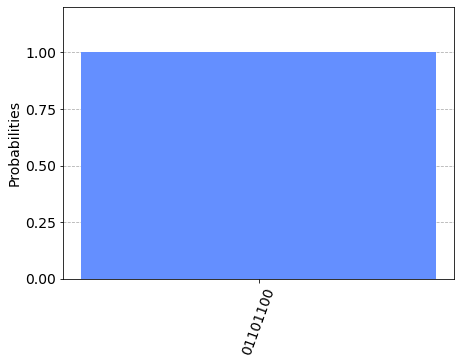

In [68]:
# Execute the circuit
ex = execute(ckt, Q_simulator, shots = 1024)
res = ex.result()
bars = res.get_counts(ckt)

        
# Plot the results
plot_histogram(bars, bar_labels=False)

# Validation: We claim there will be only one measurement result with 100% probability equal to the secret string

In [79]:
QC_predicted_secret = ''.join(list(reversed(list(bars.keys())[0])))
actual_secret = secret_key

if QC_predicted_secret==actual_secret:
    print(f'QC_predicted_secret: {QC_predicted_secret} and actual_secret: {actual_secret} \
were found to be equal, so the algorithm works correctly')
else:
    print(f'QC_predicted_secret: {QC_predicted_secret} and actual_secret: {actual_secret} \
were not found to be equal, so the algorithm doesn\'t work correctly')

QC_predicted_secret: 00110110 and actual_secret: 00110110 were found to be equal, so the algorithm works correctly


# The algorithm was implemented correctly, because the string predicted was correct